C:\Users\Ivica Obadic\PycharmProjects\EOExplainability


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


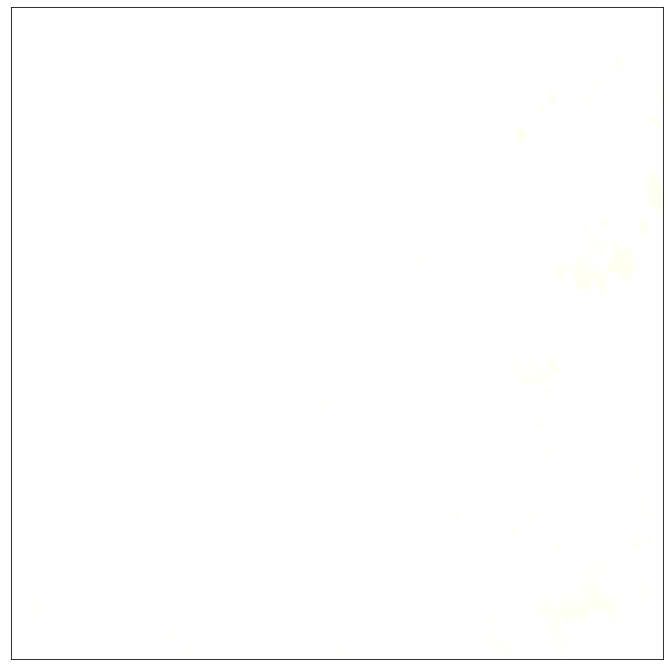

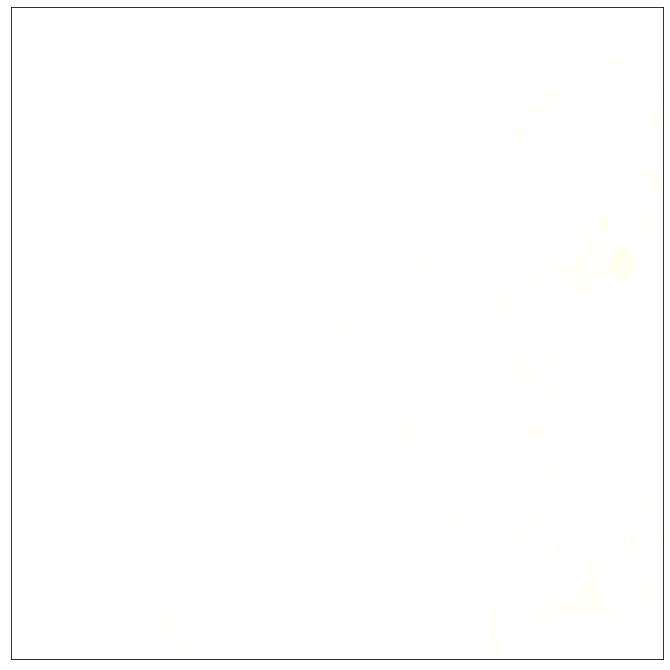

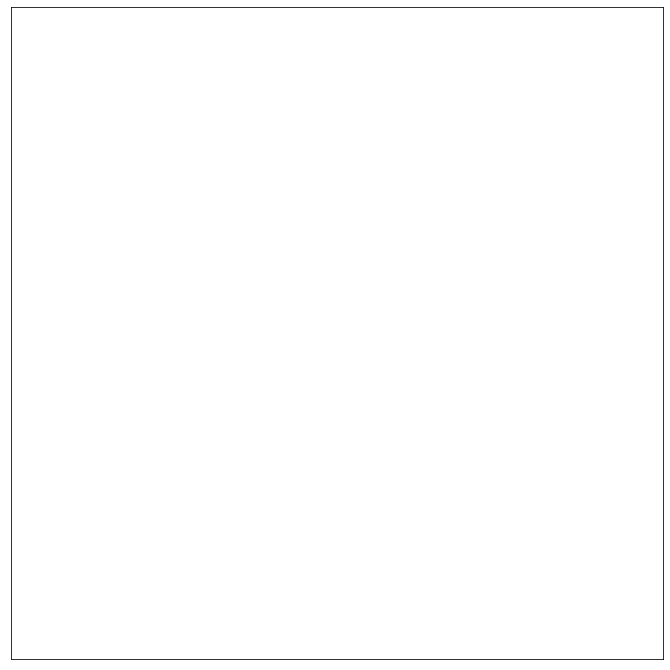

In [7]:
import sys
import rasterio
from rasterio.plot import show
import geopandas as gpd
import os
import matplotlib.pyplot as plt
from rasterio.plot import reshape_as_raster, reshape_as_image
import numpy as np
import torch

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
print(module_path)
from explainability_analysis.visualization_functions import *


field_parcels_path = "C:/Users/Ivica Obadic/Desktop/Explainable Machine Learning in Earth Observations/Projects/Uncovering Relevant Concepts for Object Detection in Aerial Images/Datasets/UC1/clearcutting/S2"

tiff_images_paths = [field_parcel for field_parcel in os.listdir(field_parcels_path) if field_parcel.endswith("tif")]

for i, tiff_image in enumerate(tiff_images_paths):
        abs_image_path = os.path.join(field_parcels_path, tiff_image)
        image = reshape_as_image(load_tiff_image(abs_image_path))
        image = image[:,:,0:3]
        fig, ax = plt.subplots(figsize=(12, 12))
        #ax.set_title(crop_type)
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        plt.imshow(image)
        #plt.savefig(os.path.join(field_parcels_path, '{}.png'.format(tiff_image)))


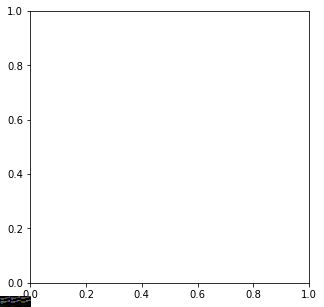

In [12]:
data = gpd.read_file("C:/Users/Ivica Obadic/Downloads/KRUM_2017_MT_pilot/KRUM_2017_MT_pilot.shp")
print(data.crs)
data.sort_values(by="Flaeche",ascending=False)

epsg:31468


,Flaeche,FID,Feldnr,Schlag,Nutzung,NutzCode,AUMNutzung,OEVF,AGZCode,FFH,SPA,Regierung,geometry
27118,31.85,DEBYLI7326000028,15,1,Sommergerste,132,ACKERLAND,None,5,0.0,0.0,7,"POLYGON ((4404531.190 5338929.090, 4404391.657..."
29535,30.47,DEBYLI7774000010,11,1,Sommergerste,132,ACKERLAND,Zwischenfr�chte,5,0.0,0.0,7,"POLYGON ((4401402.390 5331566.280, 4401407.510..."
5668,29.63,DEBYLI7334000001,2,1,Silomais,411,ACKERLAND,None,5,0.0,0.0,7,"POLYGON ((4402219.090 5333266.840, 4402228.370..."
17886,25.73,DEBYLI7788000233,17,2,Luzerne,423,ACKERFUTTER,None,5,0.0,0.0,7,"POLYGON ((4397632.899 5323775.946, 4397572.963..."
36386,23.43,DEBYLI7778000367,67,1,Winterraps,311,ACKERLAND,None,5,0.0,0.0,7,"POLYGON ((4387332.970 5329908.580, 4387412.910..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11229,0.01,DEBYLI7556000148,26,1,"Unbefestigte Mieten. Stroh-, Futter- und Dungl...",994,DAUERGRUENLAND,None,5,0.0,0.0,7,"POLYGON ((4375428.136 5327796.378, 4375426.140..."
21568,0.01,DEBYLI7750000012,18,1,"Unbefestigte Mieten. Stroh-, Futter- und Dungl...",994,DAUERGRUENLAND,None,3,0.0,0.0,7,"POLYGON ((4394543.420 5341727.166, 4394557.670..."
36784,0.00,DEBYLI7770000243,16,2,Sonstige nicht ldw. genutzte Fl�che,990,SONSTIGE,None,5,0.0,0.0,7,"POLYGON ((4393451.883 5330204.375, 4393453.536..."
26757,0.00,DEBYLI7753000245,1,2,"Unbefestigte Mieten. Stroh-, Futter- und Dungl...",994,DAUERGRUENLAND,None,5,0.0,0.0,7,"POLYGON ((4382026.244 5337070.278, 4382026.369..."


In [11]:
data = gpd.read_file("C:/Users/datasets\BavarianCrops/shp/blockpartition.shp")
print(data.crs)
data.sort_values(by="Flaeche",ascending=False)["geometry"]

epsg:4326


KeyError: 'Flaeche'

In [9]:
data.crs

<Derived Projected CRS: EPSG:31468>
Name: DHDN / 3-degree Gauss-Kruger zone 4
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Germany - former West Germany onshore between 10°30'E and 13°30'E - states of Bayern, Berlin, Niedersachsen, Schleswig-Holstein.
- bounds: (10.5, 47.39, 13.51, 54.59)
Coordinate Operation:
- name: 3-degree Gauss-Kruger zone 4
- method: Transverse Mercator
Datum: Deutsches Hauptdreiecksnetz
- Ellipsoid: Bessel 1841
- Prime Meridian: Greenwich